<a href="https://colab.research.google.com/github/ykitaguchi77/ImageProcessing/blob/master/Numpy_preprocessing_for_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Numpy image processing for Pytorch**



In [1]:
import torch
import os
import IPython
import shutil
import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np




print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#GDriveをマウント
from google.colab import drive
drive.mount('/content/drive')

Setup complete. Using torch 1.12.1+cu113 CPU
Mounted at /content/drive


In [ ]:
# image_folder = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/GO_newPatient_250px"

# img_list = glob.glob(f"{image_folder}/*")
# img = img_list[0]
# print(img)

#showimage
img = "/content/drive/MyDrive/Deep_learning/Face_Images/test_dog.jpg"
img_np = np.array(Image.open(img)).astype(np.float32)
print(img_np)
plt.imshow((img_np).astype(np.uint8))
plt.show()

[[[ 1.73516568  1.6057423   1.64653595]
  [ 1.73516568  1.6232493   1.61167756]
  [ 1.76941519  1.65826331  1.64653595]
  ...
  [ 1.87216371  1.95588235  2.11712418]
  [ 1.87216371  1.95588235  2.11712418]
  [ 1.90641322  1.93837535  2.11712418]]

 [[ 1.73516568  1.6057423   1.64653595]
  [ 1.73516568  1.6232493   1.61167756]
  [ 1.76941519  1.65826331  1.64653595]
  ...
  [ 1.87216371  1.95588235  2.11712418]
  [ 1.87216371  1.95588235  2.11712418]
  [ 1.90641322  1.93837535  2.11712418]]

 [[ 1.73516568  1.6057423   1.64653595]
  [ 1.73516568  1.6232493   1.61167756]
  [ 1.73516568  1.6232493   1.61167756]
  ...
  [ 1.87216371  1.95588235  2.11712418]
  [ 1.87216371  1.95588235  2.11712418]
  [ 1.90641322  1.93837535  2.11712418]]

 ...

 [[ 1.42692011  1.27310924  1.24566449]
  [ 1.42692011  1.27310924  1.24566449]
  [ 1.42692011  1.27310924  1.24566449]
  ...
  [ 0.60493193 -0.267507   -0.84583878]
  [ 0.58780718 -0.28501401 -0.86326797]
  [ 0.60493193 -0.232493   -0.82840959]]

 [

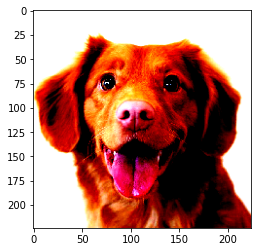

In [19]:
#ImageNetでnormalizeする（ImageとNumpyで255倍異なるので補正）
def zscore(x, axis=None):
    # xmean = x.mean(axis=axis, keepdims=True)
    xmean = [n*255 for n in [0.485, 0.456, 0.406]]
    # xstd = np.std(x, axis=axis, keepdims=True)
    xstd = [n*255 for n in [0.229, 0.224, 0.225]]
    zscore = (x-xmean)/xstd
    return zscore

PIL_img = Image.open(img)
PIL_img = PIL_img.resize((224,224), resample=0)

#convert PIL to numpy
img_np = np.array(PIL_img).astype(np.float32)
img_np = zscore(img_np)

print(img_np)

plt.imshow(img_np)
print(img_np)
plt.show()


In [ ]:
from torchvision import models, transforms

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

PIL_img = Image.open(img)
img_tensor = preprocess(PIL_img)
img_np = img_tensor.to("cpu").detach().numpy().transpose(1, 2, 0).copy()
print(img_np)